In [2]:
import missingno as msno
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import scipy.stats as st

In [3]:
pd.set_option('display.max_columns', None)  # Permet d'afficher toutes les colonnes
pd.set_option('display.max_rows', None)   # Permet d'afficher toutes les lignes

In [4]:
data_original = pd.read_csv("/content/drive/MyDrive/fr.openfoodfacts.org.products.csv", sep = "\t")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
nombre_lignes = data_original.shape[0] # stocke le nombre de lignes et de colonnes du dataframe original
nombre_colonnes = data_original.shape[1]

In [6]:
data = data_original.copy()

In [7]:
for col in data.columns :               # Affiche le nom des colonnes et le nombre de valeurs uniques dans chacune d'elles
  print(col)
  print(len(data[col].unique()))
  print("________________________")

code
320639
________________________
url
320750
________________________
creator
3536
________________________
created_t
189637
________________________
created_datetime
189569
________________________
last_modified_t
180639
________________________
last_modified_datetime
180495
________________________
product_name
221348
________________________
generic_name
38585
________________________
quantity
13827
________________________
packaging
14548
________________________
packaging_tags
12065
________________________
brands
58785
________________________
brands_tags
50254
________________________
categories
36983
________________________
categories_tags
21143
________________________
categories_fr
21153
________________________
origins
4841
________________________
origins_tags
4373
________________________
manufacturing_places
7309
________________________
manufacturing_places_tags
6737
________________________
labels
18115
________________________
labels_tags
13654
____________________

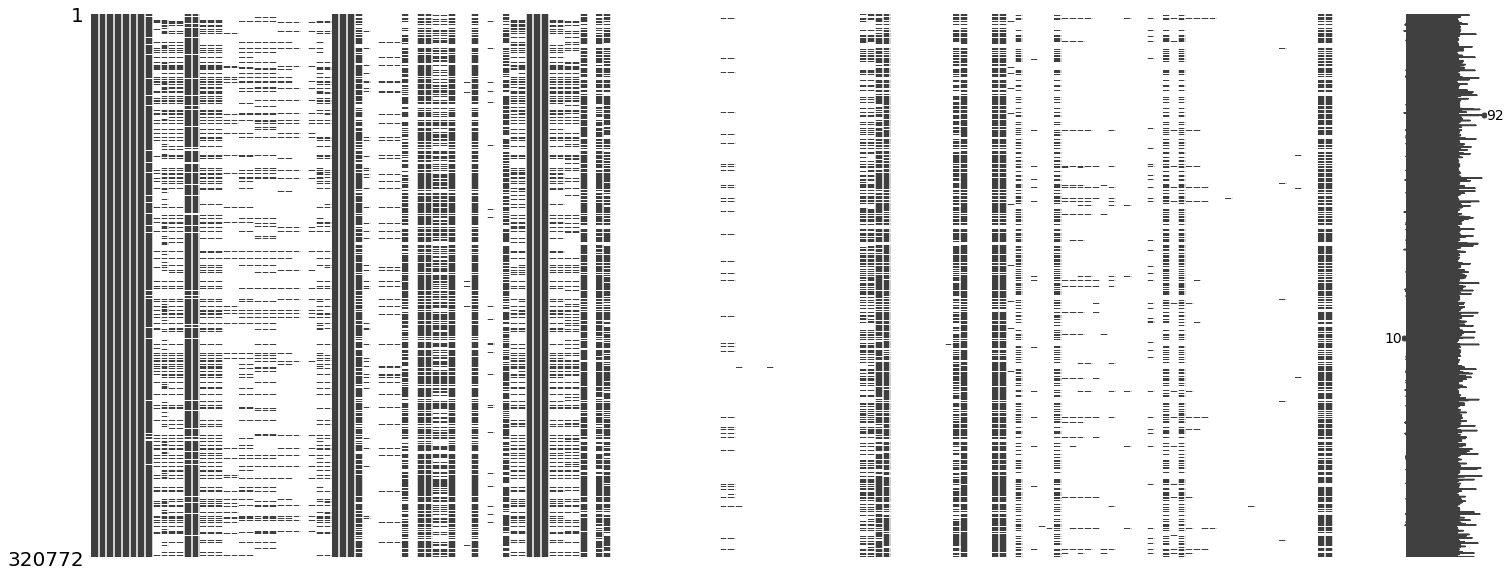

In [8]:
msno.matrix(data_original.sample(320772))

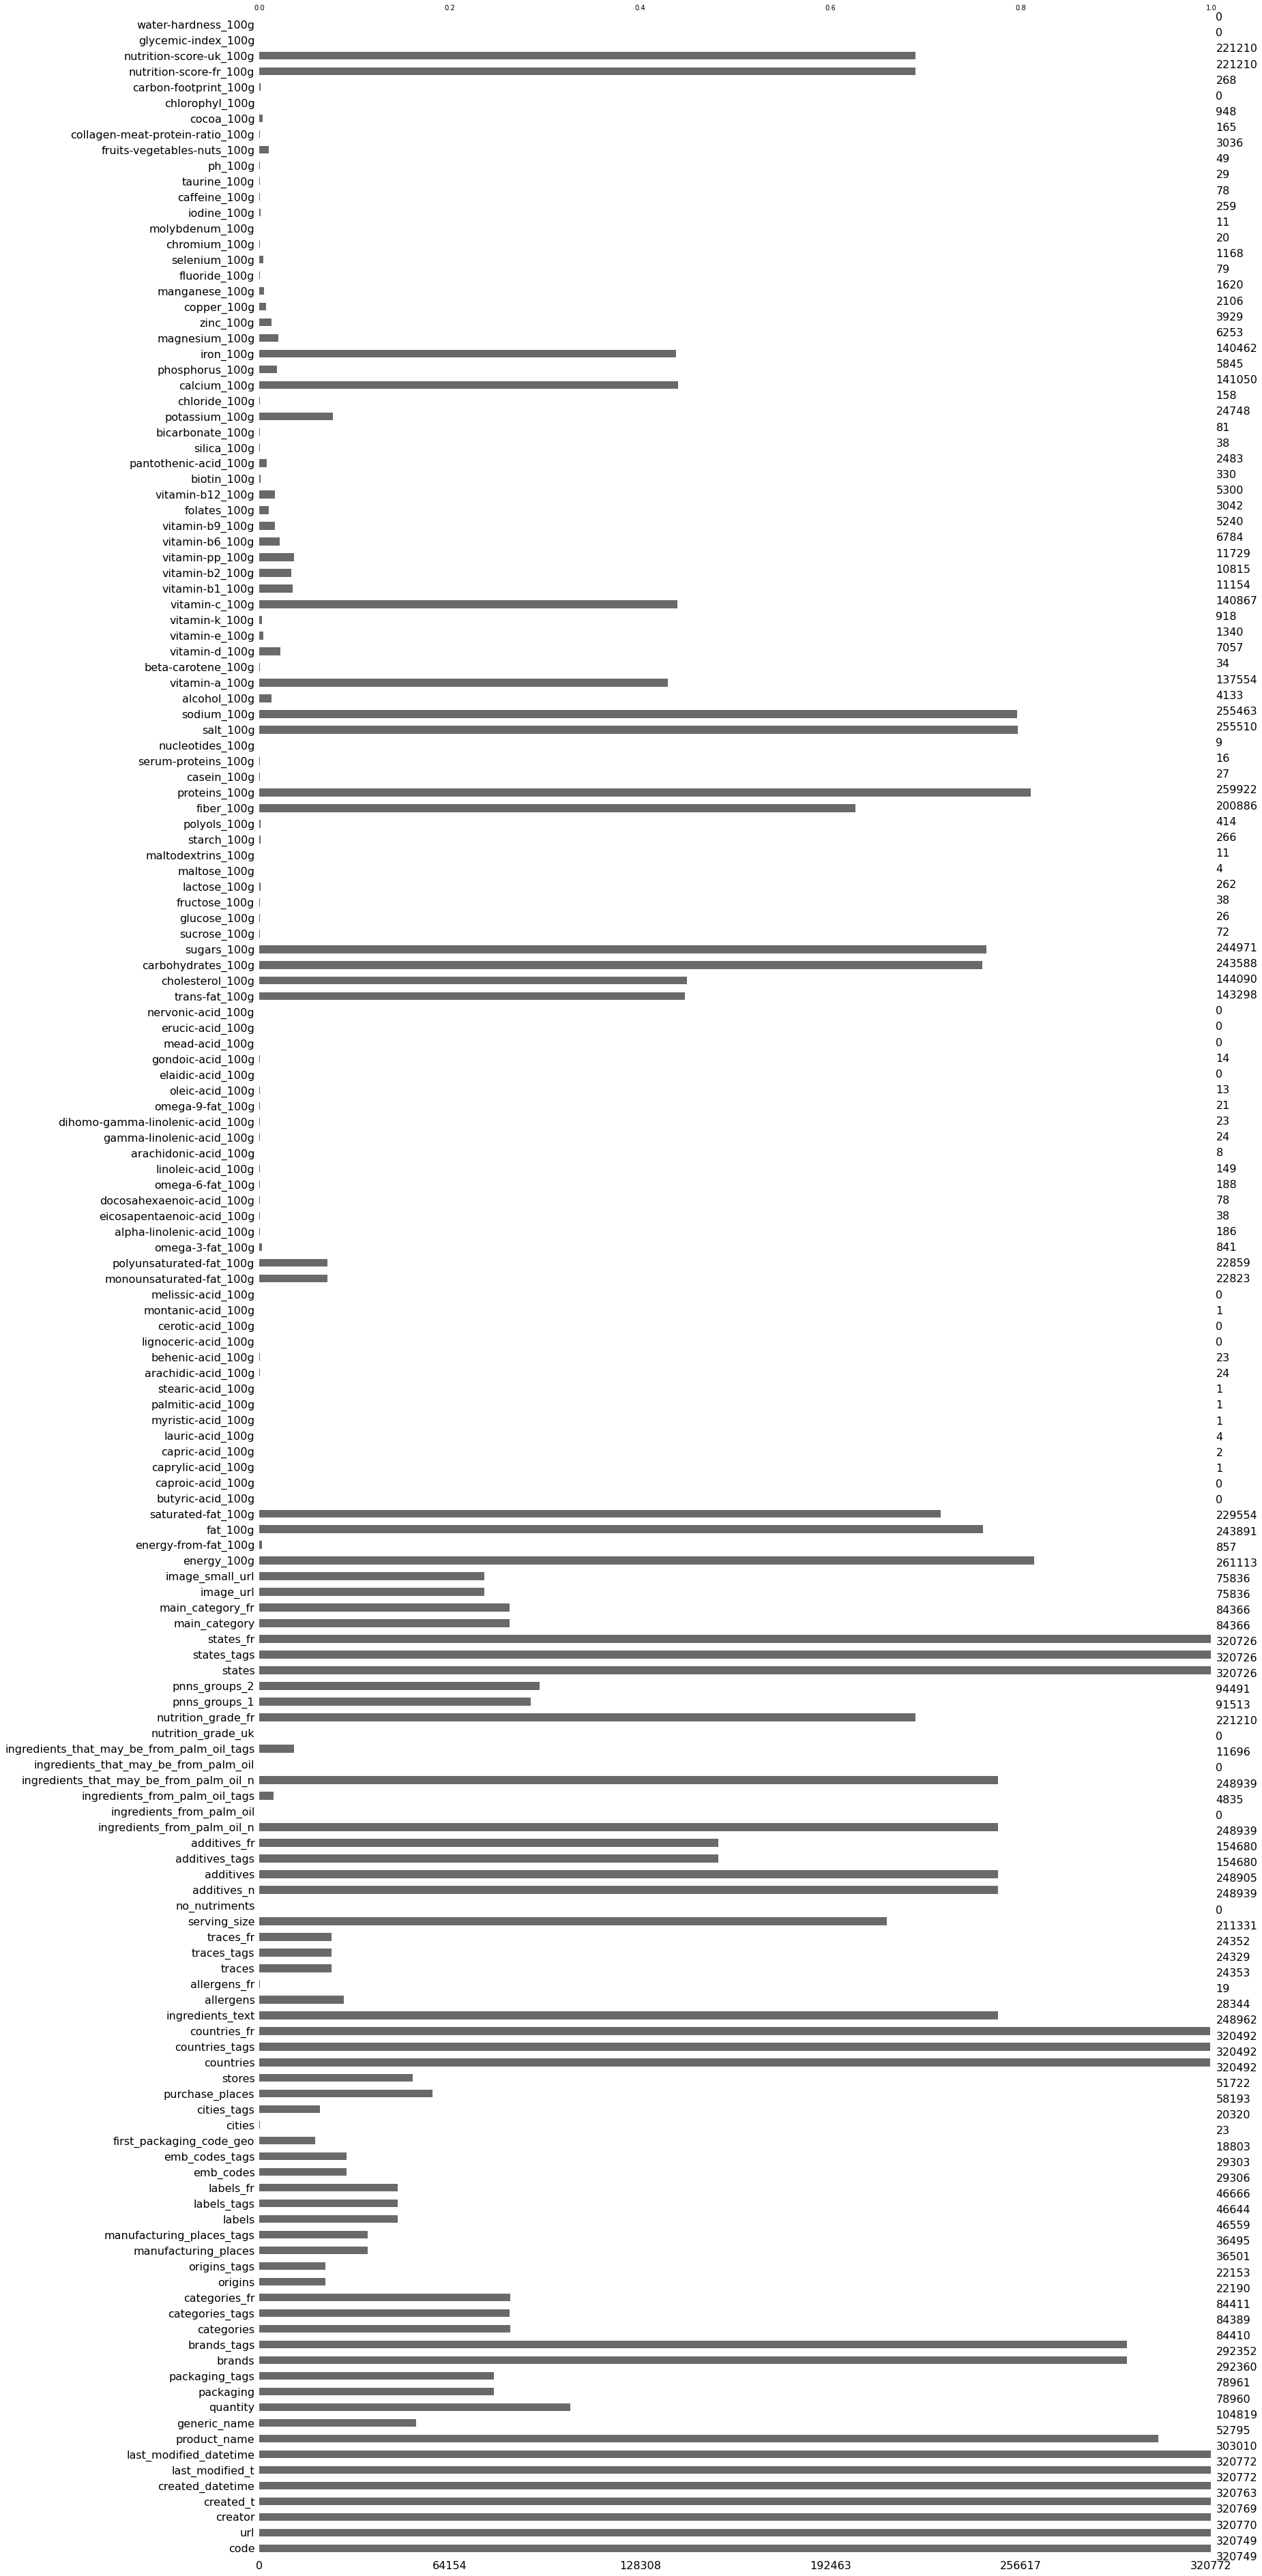

In [9]:
msno.bar(data_original.sample(320772))

In [10]:
a = []
b = []
c = []                                      # crée 3 listes vides a, b et c

for columns in data_original.columns : 
  a.append(columns)                               # a va contenir le nom de chaque colonne de data
  b.append(data_original[columns].notna().mean() *100)     # b va contenir la moyenne de données présentes de chaque colonne de data
  c.append(data_original[columns].dtype)                   # c va contenir le type de chaque colonne de data

data_original_quality = DataFrame(data = a, columns = ["Nom colonne"])   # crée un dataframe data_quality et crée sa première colonne "Nom colonne"
data_original_quality["% remplie"] = b                                   # crée la deuxième colonne "% remplie"
data_original_quality["Type de la colonne"] = c                          # crée la troisième colonne "Type de la colonne"

In [11]:
data_original_quality

,Nom colonne,% remplie,Type de la colonne
0,code,99.992830,object
1,url,99.992830,object
2,creator,99.999377,object
3,created_t,99.999065,object
4,created_datetime,99.997194,object
5,last_modified_t,100.000000,object
6,last_modified_datetime,100.000000,object
7,product_name,94.462734,object
8,generic_name,16.458731,object
9,quantity,32.677104,object


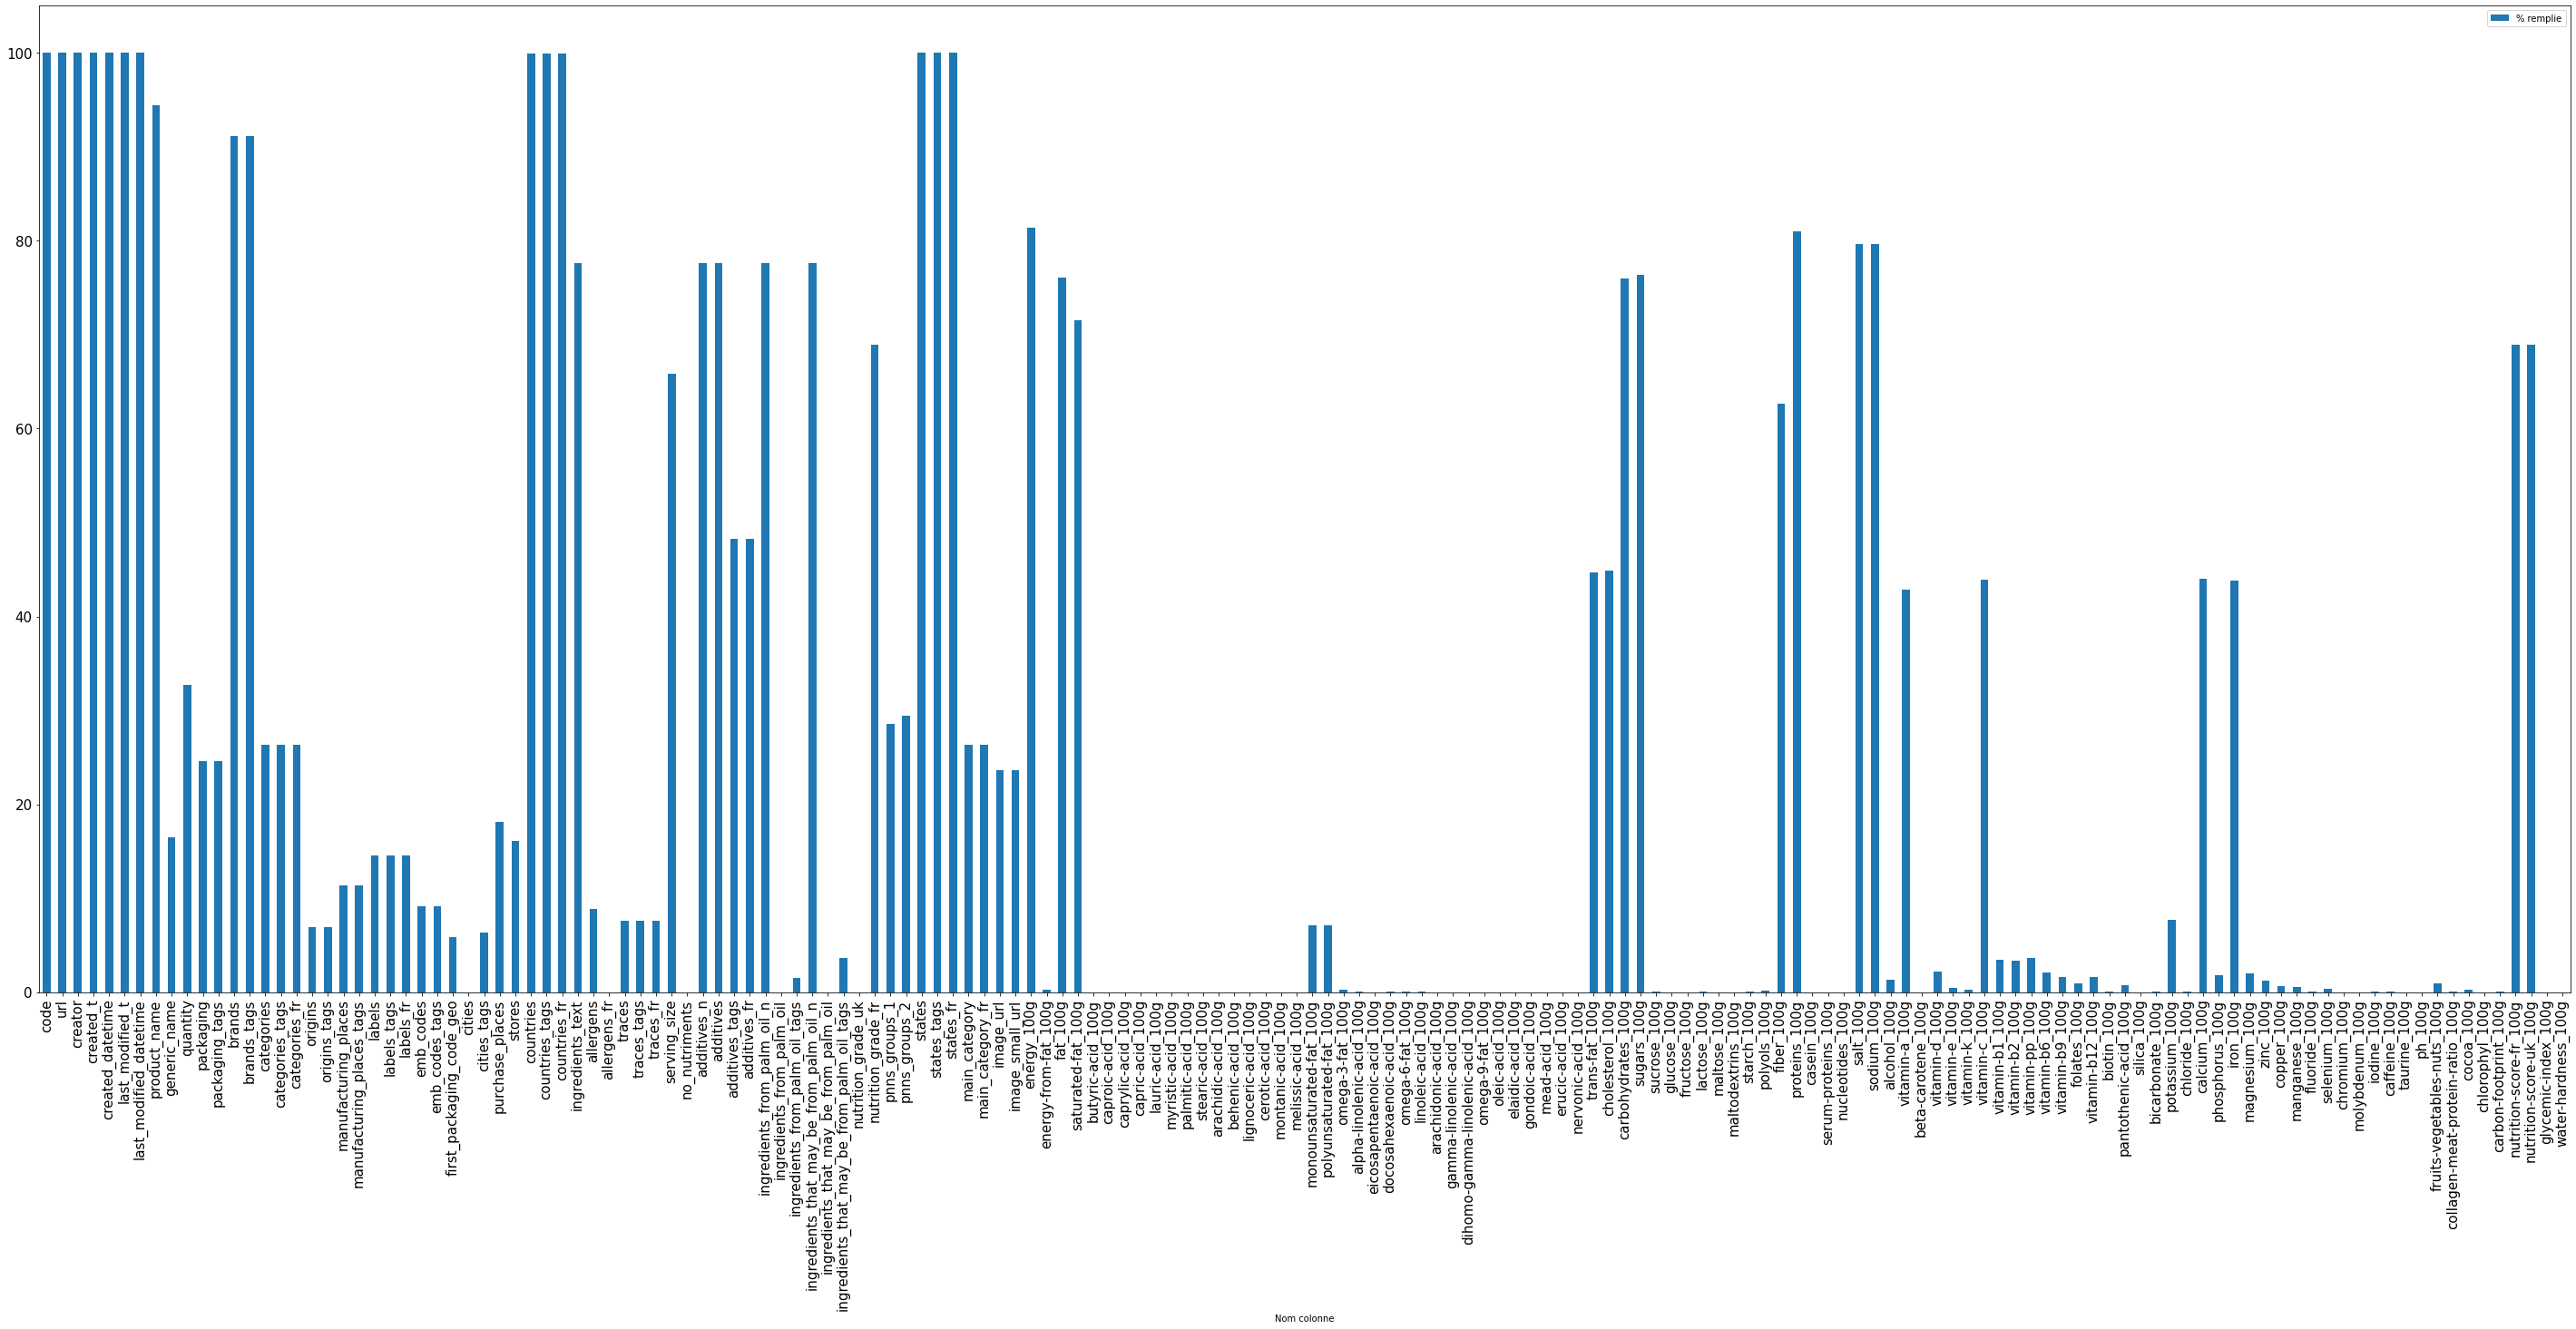

In [12]:
data_original_quality.plot(kind='bar', x ="Nom colonne", y = "% remplie", fontsize=15, figsize=(50, 20))

In [13]:
data_original_quality.loc[data_original_quality["% remplie"] > 25]

,Nom colonne,% remplie,Type de la colonne
0,code,99.992830,object
1,url,99.992830,object
2,creator,99.999377,object
3,created_t,99.999065,object
4,created_datetime,99.997194,object
5,last_modified_t,100.000000,object
6,last_modified_datetime,100.000000,object
7,product_name,94.462734,object
9,quantity,32.677104,object
12,brands,91.142618,object


In [14]:
data_original_quality.sort_values("% remplie", ascending = False)

,Nom colonne,% remplie,Type de la colonne
5,last_modified_t,100.000000,object
6,last_modified_datetime,100.000000,object
2,creator,99.999377,object
3,created_t,99.999065,object
4,created_datetime,99.997194,object
0,code,99.992830,object
1,url,99.992830,object
58,states_fr,99.985660,object
57,states_tags,99.985660,object
56,states,99.985660,object


Seuil de données : 25%

In [15]:
# Méthode 1 : préciser les colonnes à garder

colonnes_a_garder = []
subset = data_original_quality.loc[data_original_quality["% remplie"] > 25]

for index in subset.index :
  colonnes_a_garder.append(subset.at[index, "Nom colonne"])

print(colonnes_a_garder)

for col in data.columns:
    if col in colonnes_a_garder:
      continue
    else :
      del data[col]

['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'countries', 'countries_tags', 'countries_fr', 'ingredients_text', 'serving_size', 'additives_n', 'additives', 'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr', 'main_category', 'main_category_fr', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g']


In [ ]:
# Méthode 2 : préciser les colonnes à supprimer

colonnes_a_supprimer = []
subset = data_original_quality.loc[data_original_quality["% remplie"] == 0]

for index in subset.index :
  colonnes_a_supprimer.append(subset.at[index, "Nom colonne"])

print(colonnes_a_supprimer)

for col in data.columns:
    if col in colonnes_a_supprimer:
      del data[col]
    else :
      continue

In [16]:
print(data_original.shape)
print(data.shape)

(320772, 162)
(320772, 50)


**Premier tri :** présence des données supérieure à 25%

Avant tri : 162 colonnes

Après tri : 50 colonnes

Suppression des colonnes inutiles ou redondantes pour l'étude

In [17]:
data = data.drop(columns=['main_category','categories','categories_tags','countries','countries_tags','additives','additives_tags','brands','url','creator','created_t','last_modified_t','states','states_tags','states_fr','nutrition-score-uk_100g',"ingredients_that_may_be_from_palm_oil_n","serving_size"])

In [18]:
data.shape

(320772, 32)

Après tri : 32 colonnes

**Nettoyage des données** : types

In [ ]:
data.dtypes

**Premier nettoyage : les dates**

Les colonnes created_datetime et last_modified_datetime ne sont pas au bon format.

Elles sont au format yyyy-mm-ddThh-mm-ssZ donc je remplace le T par un espace et je supprime le Z.

In [20]:
data['created_datetime'] = data['created_datetime'].str.replace('T',' ')
data['created_datetime'] = data['created_datetime'].str.replace('Z','')

data['last_modified_datetime'] = data['last_modified_datetime'].str.replace('T',' ')
data['last_modified_datetime'] = data['last_modified_datetime'].str.replace('Z','')

Normalement, toutes les dates doivent maintenant avoir 19 caractères, mais certaines lignes ont des valeurs mal remplies.

In [21]:
data.loc[data["created_datetime"].str.len() != 19.0]

,code,created_datetime,last_modified_datetime,product_name,quantity,brands_tags,categories_fr,countries_fr,ingredients_text,additives_n,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
187478,3017760038409,NaN,2017-03-08 16:54:15,Lulu la barquette (Fraise),120 g,lu,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Bar...","France,Suisse","Sirop de glucose-fructose, purée de fraises 27...",2.0,"E440 - Pectines,E330 - Acide citrique",0.0,d,Sugary snacks,Biscuits and cakes,Biscuits,1480.0,2.1,0.5,NaN,NaN,78.0,60.0,1.2,4.200,0.08,0.031496,NaN,NaN,NaN,NaN,13.0
189068,NaN,NaN,"en:belgium,en:france","Belgique,France",NaN,NaN,6,en:whole-milk-yogurts,Yaourts entiers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189103,NaN,"Dia,Sogeres",en:france,France,"Lait, lait, crème",NaN,6,en:whole-milk-yogurts,Yaourts entiers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189109,NaN,NaN,"en:belgium,en:france,en:switzerland","Belgique,France,Suisse",NaN,NaN,4,en:whole-milk-yogurts,Yaourts entiers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189119,NaN,SuperU,en:france,France,Lait,NaN,9,en:stirred-yogurts,Yaourts brassés,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189152,NaN,Carrefour,en:france,France,"Lait, lait",NaN,10,en:yogurts,Yaourts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189160,NaN,NaN,en:france,France,"Lait, lait",NaN,7,en:fruit-yogurts,Yaourts aux fruits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189162,NaN,Auchan,en:france,France,"Lait, lait, lait, lait, lait",NaN,10,en:fruit-yogurts,Yaourts aux fruits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189168,NaN,NaN,en:france,France,"Lait, lait, crème, lactiques",NaN,2,en:stirred-yogurts,Yaourts brassés,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189242,NaN,Carrefour market,en:france,France,"Lait, lait, lait",NaN,4,en:whole-milk-yogurts,Yaourts entiers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
data.loc[data["last_modified_datetime"].str.len() != 19.0]

,code,created_datetime,last_modified_datetime,product_name,quantity,brands_tags,categories_fr,countries_fr,ingredients_text,additives_n,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
189068,NaN,NaN,"en:belgium,en:france","Belgique,France",NaN,NaN,6,en:whole-milk-yogurts,Yaourts entiers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189103,NaN,"Dia,Sogeres",en:france,France,"Lait, lait, crème",NaN,6,en:whole-milk-yogurts,Yaourts entiers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189109,NaN,NaN,"en:belgium,en:france,en:switzerland","Belgique,France,Suisse",NaN,NaN,4,en:whole-milk-yogurts,Yaourts entiers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189119,NaN,SuperU,en:france,France,Lait,NaN,9,en:stirred-yogurts,Yaourts brassés,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189152,NaN,Carrefour,en:france,France,"Lait, lait",NaN,10,en:yogurts,Yaourts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189160,NaN,NaN,en:france,France,"Lait, lait",NaN,7,en:fruit-yogurts,Yaourts aux fruits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189162,NaN,Auchan,en:france,France,"Lait, lait, lait, lait, lait",NaN,10,en:fruit-yogurts,Yaourts aux fruits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189168,NaN,NaN,en:france,France,"Lait, lait, crème, lactiques",NaN,2,en:stirred-yogurts,Yaourts brassés,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189242,NaN,Carrefour market,en:france,France,"Lait, lait, lait",NaN,4,en:whole-milk-yogurts,Yaourts entiers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189244,NaN,Carrefour market,en:france,France,"Lait, lait, lait, lait",NaN,5,en:whole-milk-yogurts,Yaourts entiers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On peut voir que ces erreurs correspondent aux lignes pour lesquelles la colonne "code" est vide. Ces lignes ne semblent pas contenir d'informations utiles et semblent aberrantes.

In [23]:
data.loc[data["code"].isna()]

,code,created_datetime,last_modified_datetime,product_name,quantity,brands_tags,categories_fr,countries_fr,ingredients_text,additives_n,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
189068,NaN,NaN,"en:belgium,en:france","Belgique,France",NaN,NaN,6,en:whole-milk-yogurts,Yaourts entiers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189103,NaN,"Dia,Sogeres",en:france,France,"Lait, lait, crème",NaN,6,en:whole-milk-yogurts,Yaourts entiers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189109,NaN,NaN,"en:belgium,en:france,en:switzerland","Belgique,France,Suisse",NaN,NaN,4,en:whole-milk-yogurts,Yaourts entiers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189119,NaN,SuperU,en:france,France,Lait,NaN,9,en:stirred-yogurts,Yaourts brassés,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189152,NaN,Carrefour,en:france,France,"Lait, lait",NaN,10,en:yogurts,Yaourts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189160,NaN,NaN,en:france,France,"Lait, lait",NaN,7,en:fruit-yogurts,Yaourts aux fruits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189162,NaN,Auchan,en:france,France,"Lait, lait, lait, lait, lait",NaN,10,en:fruit-yogurts,Yaourts aux fruits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189168,NaN,NaN,en:france,France,"Lait, lait, crème, lactiques",NaN,2,en:stirred-yogurts,Yaourts brassés,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189242,NaN,Carrefour market,en:france,France,"Lait, lait, lait",NaN,4,en:whole-milk-yogurts,Yaourts entiers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189244,NaN,Carrefour market,en:france,France,"Lait, lait, lait, lait",NaN,5,en:whole-milk-yogurts,Yaourts entiers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Je supprime ces lignes.

In [24]:
print("Avant modification :", data.shape[0], "lignes.")
a = data.shape[0]

data.drop(data.loc[data["code"].isna()].index, inplace=True)

print("Après modification :", data.shape[0], "lignes.")
b = data.shape[0]

c = a - b
d = c / a * 100
print(c, "lignes ont été supprimées, soit", d, "% des données.")

Avant modification : 320772 lignes.
Après modification : 320749 lignes.
23 lignes ont été supprimées, soit 0.007170201887945333 % des données.


Les colonnes created_datetime et last_modified_datetime sont maintenant uniformes, je les passe au format datetime.

In [25]:
data['created_datetime'] = pd.to_datetime(data['created_datetime'], format='%Y-%m-%d %H:%M:%S')

data['last_modified_datetime'] = pd.to_datetime(data['last_modified_datetime'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
data.dtypes

**Type : colonne codes**

Certains codes sont au format int et d'autres au format str.

Etant donné qu'aucun calcul ne sera fait sur ces codes, on peut les convertir tous en str.


In [27]:
data['code'] = data['code'].astype(str)

**Nettoyage des valeurs aberrantes**

Il faut vérifier que dans les colonnes "100g", il n'y pas de valeurs supérieures à 100 ou inférieures à 0

In [28]:
colonnes_100g = ["trans-fat_100g","cholesterol_100g","fiber_100g","vitamin-a_100g","vitamin-c_100g","calcium_100g","iron_100g","fat_100g","saturated-fat_100g","carbohydrates_100g","sugars_100g","proteins_100g","salt_100g","sodium_100g"]

In [ ]:
data[colonnes_100g].describe()

In [30]:
for colonne in colonnes_100g :
  subset = data.loc[data[colonne] > 100]     
  print("Dans la colonne ",str(colonne)," il y a ", subset.shape[0], "lignes supérieures à 100.")

  subset = data.loc[data[colonne] < 0]
  print("Dans la colonne ",str(colonne)," il y a ", subset.shape[0], "lignes inférieures à 0.")

Dans la colonne  trans-fat_100g  il y a  5 lignes supérieures à 100.
Dans la colonne  trans-fat_100g  il y a  4 lignes inférieures à 0.
Dans la colonne  cholesterol_100g  il y a  0 lignes supérieures à 100.
Dans la colonne  cholesterol_100g  il y a  0 lignes inférieures à 0.
Dans la colonne  fiber_100g  il y a  4 lignes supérieures à 100.
Dans la colonne  fiber_100g  il y a  1 lignes inférieures à 0.
Dans la colonne  vitamin-a_100g  il y a  0 lignes supérieures à 100.
Dans la colonne  vitamin-a_100g  il y a  1 lignes inférieures à 0.
Dans la colonne  vitamin-c_100g  il y a  3 lignes supérieures à 100.
Dans la colonne  vitamin-c_100g  il y a  1 lignes inférieures à 0.
Dans la colonne  calcium_100g  il y a  10 lignes supérieures à 100.
Dans la colonne  calcium_100g  il y a  0 lignes inférieures à 0.
Dans la colonne  iron_100g  il y a  0 lignes supérieures à 100.
Dans la colonne  iron_100g  il y a  1 lignes inférieures à 0.
Dans la colonne  fat_100g  il y a  4 lignes supérieures à 100.
Da

In [31]:
a = 0
b = data.shape[0]

for colonne in colonnes_100g :
  subset = data.loc[data[colonne] > 100]  
  data = data.drop(subset.index)
  print("Dans la colonne ",str(colonne)," j'ai supprimé ", subset.shape[0], "lignes supérieures à 100.")
  a += subset.shape[0]

  subset = data.loc[data[colonne] < 0]
  data = data.drop(subset.index)
  print("Dans la colonne ",str(colonne)," j'ai supprimé ", subset.shape[0], "lignes inférieures à 0.")
  a += subset.shape[0]

c = a / b * 100

print("En tout,", a, "lignes ont été supprimées, soit" , c, "% des données.")

Dans la colonne  trans-fat_100g  j'ai supprimé  5 lignes supérieures à 100.
Dans la colonne  trans-fat_100g  j'ai supprimé  4 lignes inférieures à 0.
Dans la colonne  cholesterol_100g  j'ai supprimé  0 lignes supérieures à 100.
Dans la colonne  cholesterol_100g  j'ai supprimé  0 lignes inférieures à 0.
Dans la colonne  fiber_100g  j'ai supprimé  4 lignes supérieures à 100.
Dans la colonne  fiber_100g  j'ai supprimé  1 lignes inférieures à 0.
Dans la colonne  vitamin-a_100g  j'ai supprimé  0 lignes supérieures à 100.
Dans la colonne  vitamin-a_100g  j'ai supprimé  1 lignes inférieures à 0.
Dans la colonne  vitamin-c_100g  j'ai supprimé  3 lignes supérieures à 100.
Dans la colonne  vitamin-c_100g  j'ai supprimé  1 lignes inférieures à 0.
Dans la colonne  calcium_100g  j'ai supprimé  10 lignes supérieures à 100.
Dans la colonne  calcium_100g  j'ai supprimé  0 lignes inférieures à 0.
Dans la colonne  iron_100g  j'ai supprimé  0 lignes supérieures à 100.
Dans la colonne  iron_100g  j'ai sup

Lignes qui ne contiennent aucune données nutritionnelles

In [32]:
print("Avant modification :", data.shape[0], "lignes.")
a = data.shape[0]

data.dropna(subset=["trans-fat_100g","cholesterol_100g","fiber_100g","vitamin-a_100g","vitamin-c_100g","calcium_100g","iron_100g","fat_100g","saturated-fat_100g","carbohydrates_100g","sugars_100g","proteins_100g","salt_100g","sodium_100g"], how='all', inplace=True)

print("Après modification :", data.shape[0], "lignes.")
b = data.shape[0]

c = a - b
d = c / a * 100
print(c, "lignes ont été supprimées, soit", d, "% des données.")

Avant modification : 320530 lignes.
Après modification : 262073 lignes.
58457 lignes ont été supprimées, soit 18.237606464293513 % des données.


Doublons

In [ ]:
print("Avant modification :", data.shape[0], "lignes.")
a = data.shape[0]

data.drop_duplicates(subset ="code", keep = 'last', inplace=True)

print("Après modification :", data.shape[0], "lignes.")
b = data.shape[0]

c = a - b
d = c / a * 100
print(c, "lignes ont été supprimées, soit", d, "% des données.")

Avant modification : 262073 lignes.
Après modification : 261944 lignes.
129 lignes ont été supprimées, soit 0.049222926436527224 % des données.


Uniformisation des colonnes string contenant des erreurs d'entrées

In [ ]:
colonnes_string = ["countries_fr","pnns_groups_1","pnns_groups_2","main_category_fr"]

In [ ]:
for colonne in colonnes_string :
  print(" ")
  print(str(colonne))
  print("Nombre d'entrées uniques :")
  print(len(data[colonne].unique()))
  print("_________________________")


In [ ]:
a = []
b = []                              

for colonne in colonnes_string : 
  a.append(str(colonne))
  b.append(len(data[colonne].unique())) 

string_unique = DataFrame(data = a, columns = ["Nom colonne"])   
string_unique["Entrées uniques"] = b

In [ ]:
data["pnns_groups_1"].value_counts()

unknown                    12809
Sugary snacks              10226
Milk and dairy products     7770
Cereals and potatoes        7433
Beverages                   6492
Composite foods             6012
Fish Meat Eggs              5924
Fat and sauces              4127
Fruits and vegetables       3979
Salty snacks                2467
fruits-and-vegetables        765
sugary-snacks                404
cereals-and-potatoes          15
salty-snacks                   1
Name: pnns_groups_1, dtype: int64

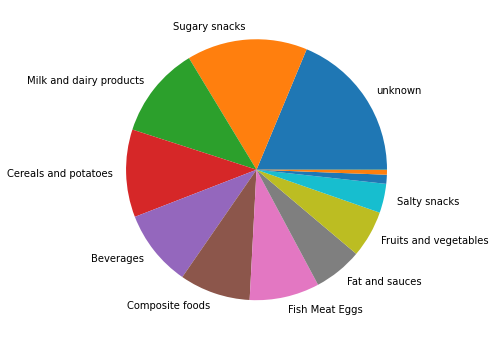

In [ ]:
pnns_groups_1 = data["pnns_groups_1"].value_counts()
pd.Series(pnns_groups_1)

ax = pd.Series(pnns_groups_1).plot.pie(subplots=True, label='',
     labels = ['unknown', 'Sugary snacks', 
     'Milk and dairy products', 'Cereals and potatoes',
     'Beverages','Composite foods','Fish Meat Eggs','Fat and sauces','Fruits and vegetables','Salty snacks','','','',''],
     figsize = (8, 6))

In [ ]:
data["pnns_groups_1"].fillna("unknown", inplace = True)

data["pnns_groups_1"] = data['pnns_groups_1'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

data["pnns_groups_1"] = data["pnns_groups_1"].str.lower()  

data['pnns_groups_1'] = data['pnns_groups_1'].str.replace(' ', '-')

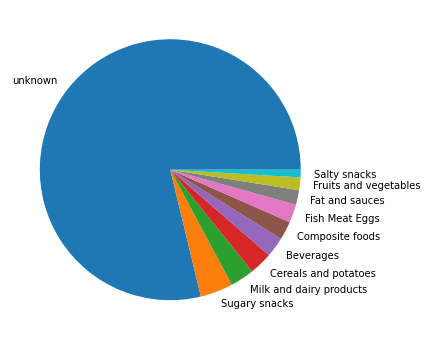

In [ ]:
pnns_groups_1 = data["pnns_groups_1"].value_counts()
pd.Series(pnns_groups_1)

ax = pd.Series(pnns_groups_1).plot.pie(subplots=True, label='',
     labels = ['unknown', 'Sugary snacks', 
     'Milk and dairy products', 'Cereals and potatoes',
     'Beverages','Composite foods','Fish Meat Eggs','Fat and sauces','Fruits and vegetables','Salty snacks'],
     figsize = (8, 6))

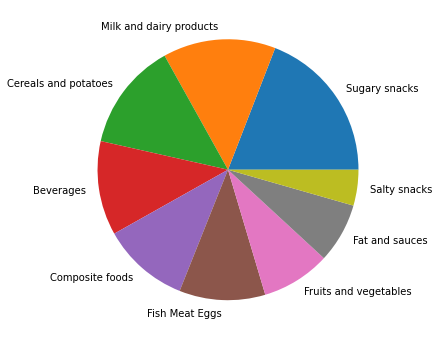

In [ ]:
pnns_groups_1_1 = pnns_groups_1.drop(labels = "unknown")
ax = pd.Series(pnns_groups_1_1).plot.pie(subplots=True, label='',
     labels = ['Sugary snacks', 
     'Milk and dairy products', 'Cereals and potatoes',
     'Beverages','Composite foods','Fish Meat Eggs','Fruits and vegetables','Fat and sauces','Salty snacks'],
     figsize = (8, 6))

In [ ]:
data["pnns_groups_2"].value_counts()

In [ ]:
data["pnns_groups_2"].fillna("unknown", inplace = True)

data["pnns_groups_2"] = data['pnns_groups_2'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

data["pnns_groups_2"] = data["pnns_groups_2"].str.lower()  

data['pnns_groups_2'] = data['pnns_groups_2'].str.replace(' ', '-')

In [ ]:
data["main_category_fr"].value_counts()

In [ ]:
data["main_category_fr"].fillna("unknown", inplace = True)

data["main_category_fr"] = data['main_category_fr'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

data["main_category_fr"] = data["main_category_fr"].str.lower()  

data['main_category_fr'] = data['main_category_fr'].str.replace(' ', '-')

data['main_category_fr'] = data['main_category_fr'].str.split(':').str[-1]

In [ ]:
data["countries_fr"].value_counts()

In [ ]:
data["countries_fr"] = data['countries_fr'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8') # Remplace les accents et caractères spéciaux

data["countries_fr"] = data["countries_fr"].str.lower()                       # Passe tout en minuscule

data['countries_fr'] = data['countries_fr'].str.split(',').str[0]             # Ne garde que ce qu'il y a avant la virgule                                                

data['countries_fr'] = data['countries_fr'].str.split(':').str[-1]           # Supprime "en:" dans les entrées

data['countries_fr'] = data['countries_fr'].str.split('other-').str[0]        # Supprime "other-" dans les entrées

data['countries_fr'] = data['countries_fr'].str.strip()                       # Supprime les espaces vides au début et à la fin

data['countries_fr'] = data['countries_fr'].str.replace(' ', '-')             # Remplace les espaces par des tirets

In [ ]:
c = []                              

for colonne in colonnes_string : 
  c.append(len(data[colonne].unique())) 

string_unique["Entrées uniques après unif."] = c

In [ ]:
string_unique

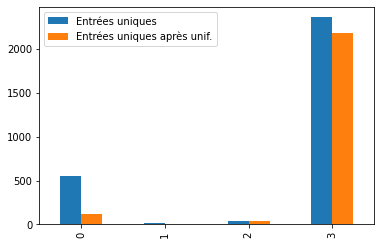

In [ ]:
string_unique.plot(kind = "bar")

Lignes qui ne contiennent ni nom, ni catégories

In [ ]:
print("Avant modification :", data.shape[0], "lignes.")
a = data.shape[0]

data = data[~((data.product_name.isnull()) 
                        & ((data.pnns_groups_1 == "unknown") 
                           | (data.main_category_fr == "unknown")))]

print("Après modification :", data.shape[0], "lignes.")
b = data.shape[0]

c = a - b
d = c / a * 100
print(c, "lignes ont été supprimées, soit", d, "% des données.")

Avant modification : 261944 lignes.
Après modification : 258853 lignes.
3091 lignes ont été supprimées, soit 1.1800232110680144 % des données.


Lignes ne contenant pas le nutriscore


In [ ]:
print("Avant modification :", data.shape[0], "lignes.")
a = data.shape[0]

data.dropna(subset=["nutrition_grade_fr"], how = 'all', inplace = True)

print("Après modification :", data.shape[0], "lignes.")
b = data.shape[0]

c = a - b
d = c / a * 100
print(c, "lignes ont été supprimées, soit", d, "% des données.")

Avant modification : 258853 lignes.
Après modification : 218319 lignes.
40534 lignes ont été supprimées, soit 15.659080636500253 % des données.


Ajout d'une colonne qui précise s'il y a des additifs présents.

In [ ]:
a = []                                     

for index, row in data.iterrows():
  if row["additives_n"] > 0 :
    z = 1
  else :
    z = 0
  a.append(z)                                  

data["contient_additifs"] = a

**Elimination des outliers via la méthode IQR**

note : cette méthode ne fonctionne pas pour les variables dont les valeurs s'approchent beaucoup de 0

__________________________________
Colonne : energy_100g
Boxplot avant détection des outliers :


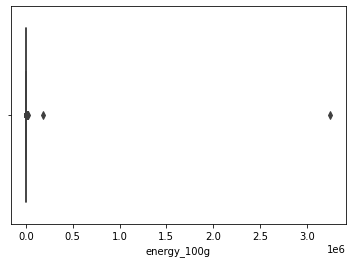

La valeur de q1 est: 452.0
La valeur de q3 est: 1715.0
La valeur de l'iqr est: 1263.0
La valeur de la limite supérieure est : -1442
La valeur de la limite inférieure est : 3610
Boxplot après détection des outliers :


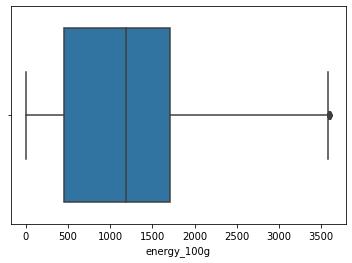

Avant modification : 218319 lignes.
Après modification : 217605 lignes.
714 lignes ont été supprimées, soit 0.3270443708518269 % des données.
 
__________________________________
Colonne : fat_100g
Boxplot avant détection des outliers :


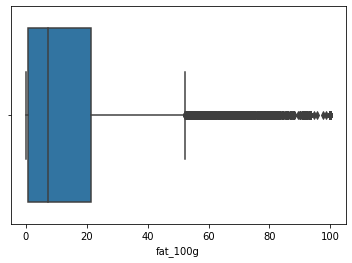

La valeur de q1 est: 0.83
La valeur de q3 est: 21.43
La valeur de l'iqr est: 20.6
La valeur de la limite supérieure est : -30
La valeur de la limite inférieure est : 52
Boxplot après détection des outliers :


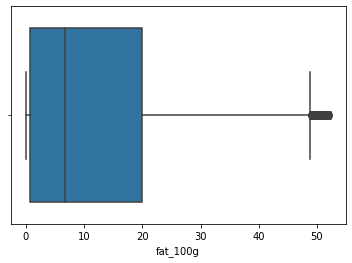

Avant modification : 217605 lignes.
Après modification : 212731 lignes.
4874 lignes ont été supprimées, soit 2.239838239011052 % des données.
 
__________________________________
Colonne : saturated-fat_100g
Boxplot avant détection des outliers :


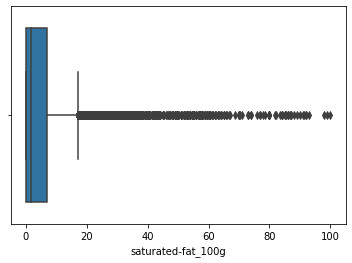

La valeur de q1 est: 0.0
La valeur de q3 est: 6.8
La valeur de l'iqr est: 6.8
La valeur de la limite supérieure est : -10
La valeur de la limite inférieure est : 17
Boxplot après détection des outliers :


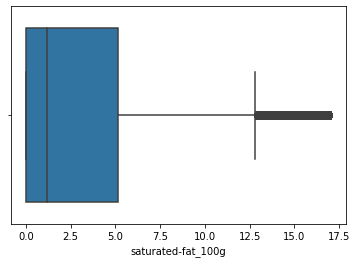

Avant modification : 212731 lignes.
Après modification : 197037 lignes.
15694 lignes ont été supprimées, soit 7.377392105522937 % des données.
 
__________________________________
Colonne : carbohydrates_100g
Boxplot avant détection des outliers :


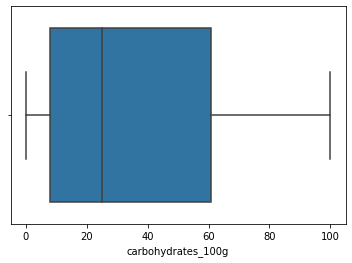

La valeur de q1 est: 7.86
La valeur de q3 est: 60.7
La valeur de l'iqr est: 52.84
La valeur de la limite supérieure est : -71
La valeur de la limite inférieure est : 140
Boxplot après détection des outliers :


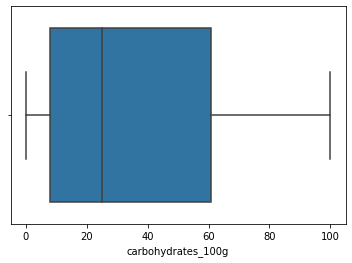

Avant modification : 197037 lignes.
Après modification : 197037 lignes.
0 lignes ont été supprimées, soit 0.0 % des données.
 
__________________________________
Colonne : sugars_100g
Boxplot avant détection des outliers :


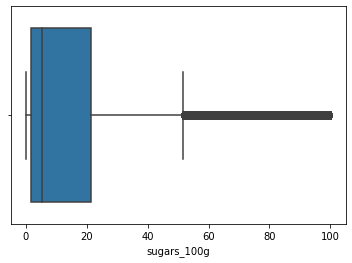

La valeur de q1 est: 1.54
La valeur de q3 est: 21.54
La valeur de l'iqr est: 20.0
La valeur de la limite supérieure est : -28
La valeur de la limite inférieure est : 52
Boxplot après détection des outliers :


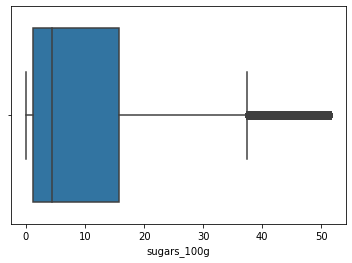

Avant modification : 197037 lignes.
Après modification : 182811 lignes.
14226 lignes ont été supprimées, soit 7.219963763151083 % des données.
 
__________________________________
Colonne : fiber_100g
Boxplot avant détection des outliers :


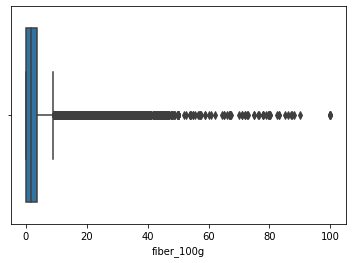

La valeur de q1 est: 0.0
La valeur de q3 est: 3.6
La valeur de l'iqr est: 3.6
La valeur de la limite supérieure est : -5
La valeur de la limite inférieure est : 9
Boxplot après détection des outliers :


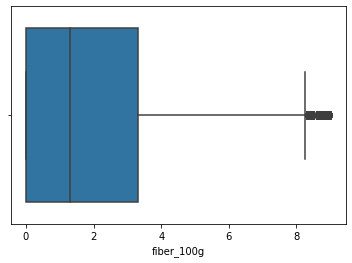

Avant modification : 182811 lignes.
Après modification : 172180 lignes.
10631 lignes ont été supprimées, soit 5.815295578493636 % des données.
 
__________________________________
Colonne : proteins_100g
Boxplot avant détection des outliers :


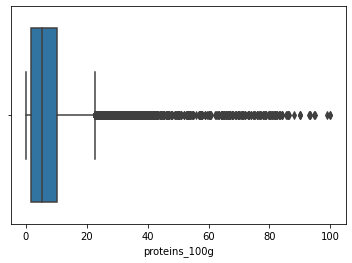

La valeur de q1 est: 1.82
La valeur de q3 est: 10.17
La valeur de l'iqr est: 8.35
La valeur de la limite supérieure est : -11
La valeur de la limite inférieure est : 23
Boxplot après détection des outliers :


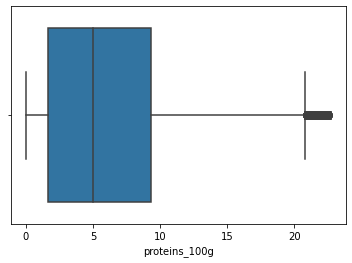

Avant modification : 172180 lignes.
Après modification : 164842 lignes.
7338 lignes ont été supprimées, soit 4.26181902660007 % des données.
 
__________________________________
Colonne : salt_100g
Boxplot avant détection des outliers :


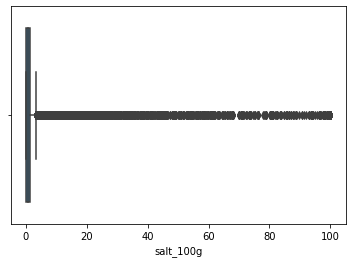

La valeur de q1 est: 0.12192
La valeur de q3 est: 1.34874
La valeur de l'iqr est: 1.22682
La valeur de la limite supérieure est : -2
La valeur de la limite inférieure est : 3
Boxplot après détection des outliers :


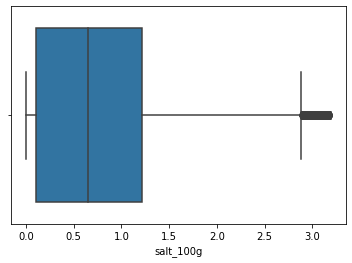

Avant modification : 164842 lignes.
Après modification : 156835 lignes.
8007 lignes ont été supprimées, soit 4.8573785807015195 % des données.
 
__________________________________
Colonne : sodium_100g
Boxplot avant détection des outliers :


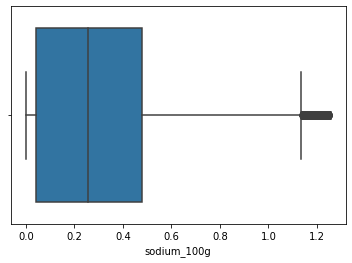

La valeur de q1 est: 0.0433070866141732
La valeur de q3 est: 0.48
La valeur de l'iqr est: 0.4366929133858268
La valeur de la limite supérieure est : -1
La valeur de la limite inférieure est : 1
Boxplot après détection des outliers :


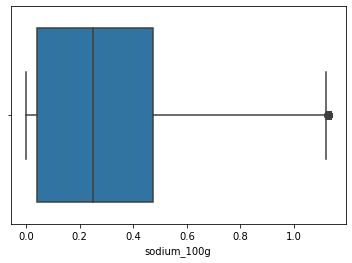

Avant modification : 156835 lignes.
Après modification : 154906 lignes.
1929 lignes ont été supprimées, soit 1.229955048299168 % des données.
 


In [ ]:
colonnes_outliers = ["energy_100g","fat_100g","saturated-fat_100g","carbohydrates_100g","sugars_100g","fiber_100g","proteins_100g","salt_100g","sodium_100g"]

for colonne in colonnes_outliers :

  print("__________________________________")
  print("Colonne :", str(colonne))
  print("Boxplot avant détection des outliers :")
  sns.boxplot(x=colonne, data=data)
  plt.show()

  sorts = data[colonne].sort_values()

  q1 = sorts.quantile(0.25)
  q3 = sorts.quantile(0.75)
  print("La valeur de q1 est:", q1)
  print("La valeur de q3 est:", q3)

  iqr = q3 - q1
  print("La valeur de l'iqr est:", iqr)

  upper = q1-1.5*iqr
  lower = q3+1.5*iqr

  print("La valeur de la limite supérieure est :", round(upper))
  print("La valeur de la limite inférieure est :", round(lower))

  clean_data = sorts[~((sorts < (upper)) | (sorts > (lower)))]

  print("Boxplot après détection des outliers :")
  sns.boxplot(x = clean_data)
  plt.show()

  print("Avant modification :", data.shape[0], "lignes.")
  a = data.shape[0]

  data = data.loc[clean_data.index]

  print("Après modification :", data.shape[0], "lignes.")
  b = data.shape[0]

  c = a - b
  d = c / a * 100
  print(c, "lignes ont été supprimées, soit", d, "% des données.")
  print(" ")


In [ ]:
for colonne in colonnes_100g :
  print(colonne)
  print("Nombre de valeurs manquantes :" ,data[colonne].isna().sum())
  print("Moyenne :" , data[colonne].mean())
  print("Mediane :" , data[colonne].median())
  print("____________________________")

**Imputation des valeurs manquantes par différentes méthodes**

In [ ]:
data1 = data.copy() # Remplissage des valeurs manquantes via la méthode fillna : médiane en se basant sur la catégorie pnns_groups_2
data2 = data.copy() # Remplissage des valeurs manquantes via la méthode IterativeImputer
data3 = data.copy() # Remplissage des valeurs manquantes via la méthode KNN

**Data1** Méthode fillna médiane en triant par catégorie

In [ ]:
for colonne in colonnes_100g :
    data1[colonne] = data1.groupby('pnns_groups_2')[colonne].transform(lambda x: x.fillna(x.median()))

In [ ]:
for colonne in colonnes_100g :
  print(colonne)
  print(" ")
  print("Avant méthode fillna")
  print("Nombre de valeurs manquantes :" ,data[colonne].isna().sum())
  print("Moyenne :" , data[colonne].mean())
  print("Mediane :" , data[colonne].median())
  print(" ")
  print("Après méthode fillna")
  print("Nombre de valeurs manquantes :" ,data1[colonne].isna().sum())
  print("Moyenne :" , data1[colonne].mean())
  print("Mediane :" , data1[colonne].median())
  print("____________________________")

**Data2** Utilisation d'IterativeImputer

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
colonnes_subset = ["energy_100g","saturated-fat_100g","sugars_100g","proteins_100g","salt_100g","sodium_100g"]
colonnes_a_remplir = ["fat_100g","trans-fat_100g","cholesterol_100g","carbohydrates_100g","fiber_100g","vitamin-a_100g","vitamin-c_100g","calcium_100g","iron_100g"]

for colonne in colonnes_a_remplir :
  colonnes_subset.append(colonne)
  subset_data2 = data2[colonnes_subset]

  imputer = IterativeImputer(min_value = 0, max_value = 100)
  imputed = imputer.fit_transform(subset_data2)

  subset_data2_imputed = pd.DataFrame(imputed, columns = subset_data2.columns)

  print("Pour la colonne ", str(colonne))
  print("Avant imputation :")
  print("Nombre de valeurs manquantes :" ,subset_data2[colonne].isna().sum())
  print("Moyenne :", subset_data2[colonne].mean(), "| Médiane :", subset_data2[colonne].median())
  print(" ")
  print("Après imputation :")
  print("Nombre de valeurs manquantes :" ,subset_data2_imputed[colonne].isna().sum())
  print("Moyenne :", subset_data2_imputed[colonne].mean(), "| Médiane :", subset_data2_imputed[colonne].median())
  print("________________________________________________")

  data2[colonne] = subset_data2_imputed[colonne].values
  colonnes_subset.remove(colonne)

Pour la colonne  fat_100g
Avant imputation :
Nombre de valeurs manquantes : 12020
Moyenne : 9.55684322676819 | Médiane : 4.9
 
Après imputation :
Nombre de valeurs manquantes : 0
Moyenne : 9.592162732009099 | Médiane : 5.0
________________________________________________
Pour la colonne  trans-fat_100g
Avant imputation :
Nombre de valeurs manquantes : 60896
Moyenne : 0.05771895117540688 | Médiane : 0.0
 
Après imputation :
Nombre de valeurs manquantes : 0
Moyenne : 0.056137539074946716 | Médiane : 0.0
________________________________________________
Pour la colonne  cholesterol_100g
Avant imputation :
Nombre de valeurs manquantes : 59433
Moyenne : 0.01587911892367476 | Médiane : 0.0
 
Après imputation :
Nombre de valeurs manquantes : 0
Moyenne : 0.016996675835043218 | Médiane : 0.006
________________________________________________
Pour la colonne  carbohydrates_100g
Avant imputation :
Nombre de valeurs manquantes : 11991
Moyenne : 30.133927235769516 | Médiane : 20.0
 
Après imputation

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


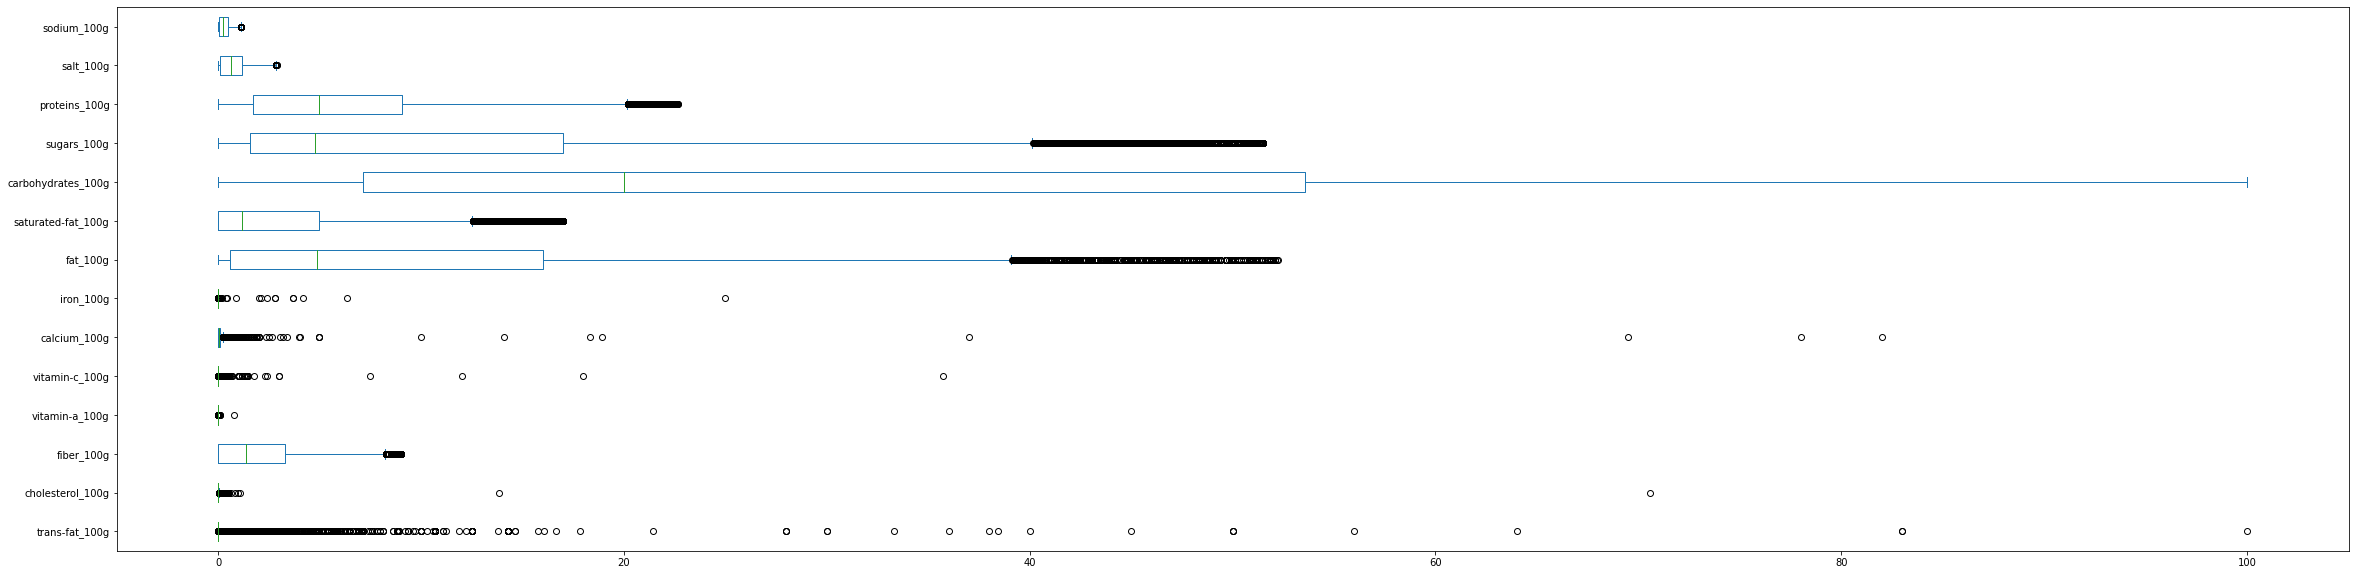

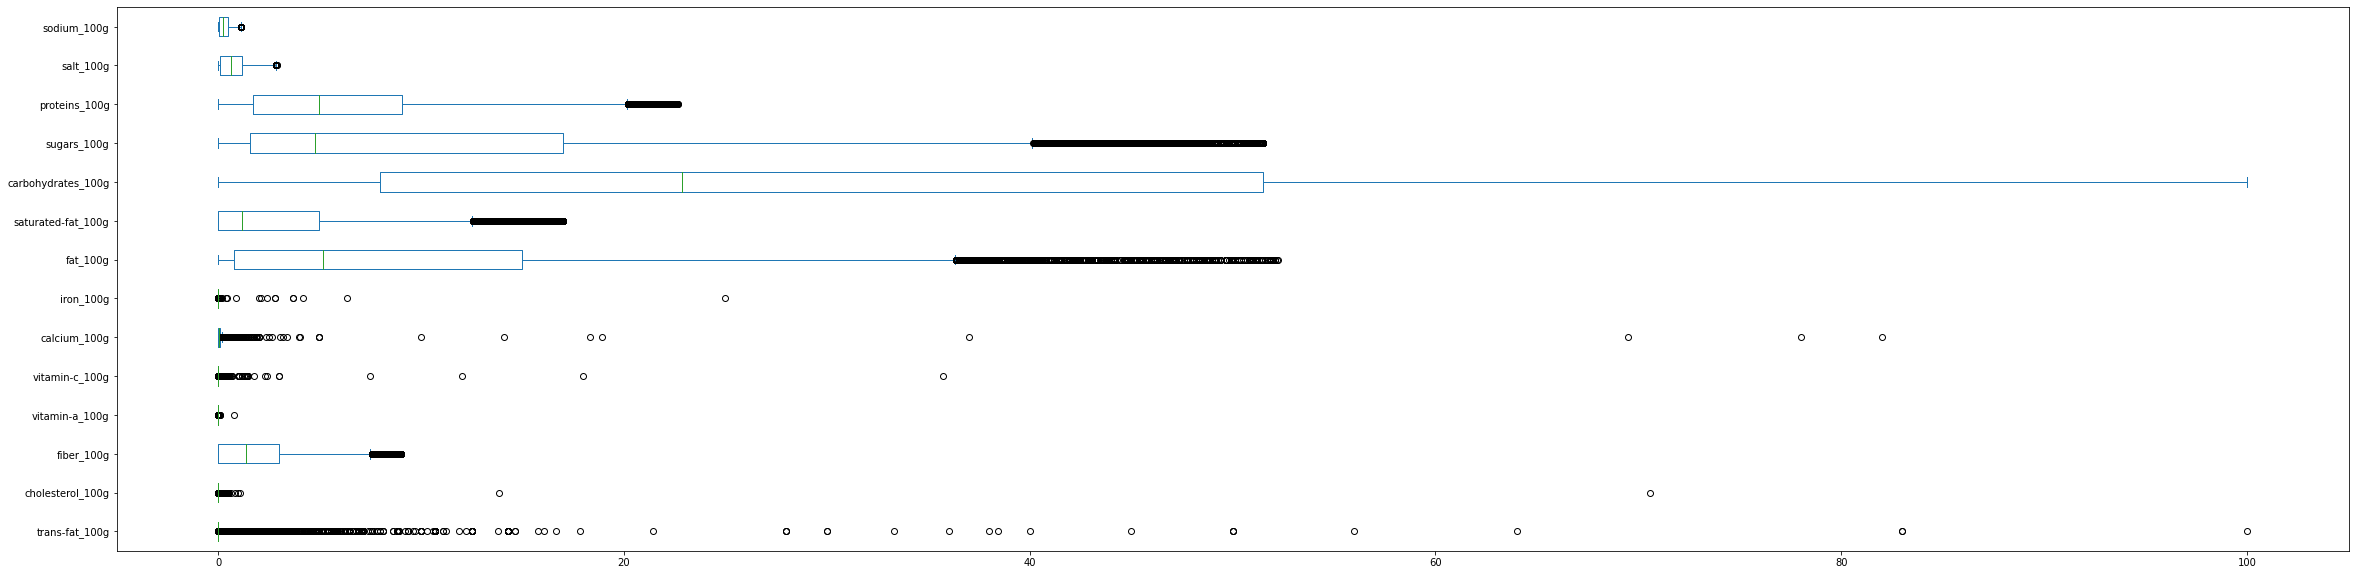

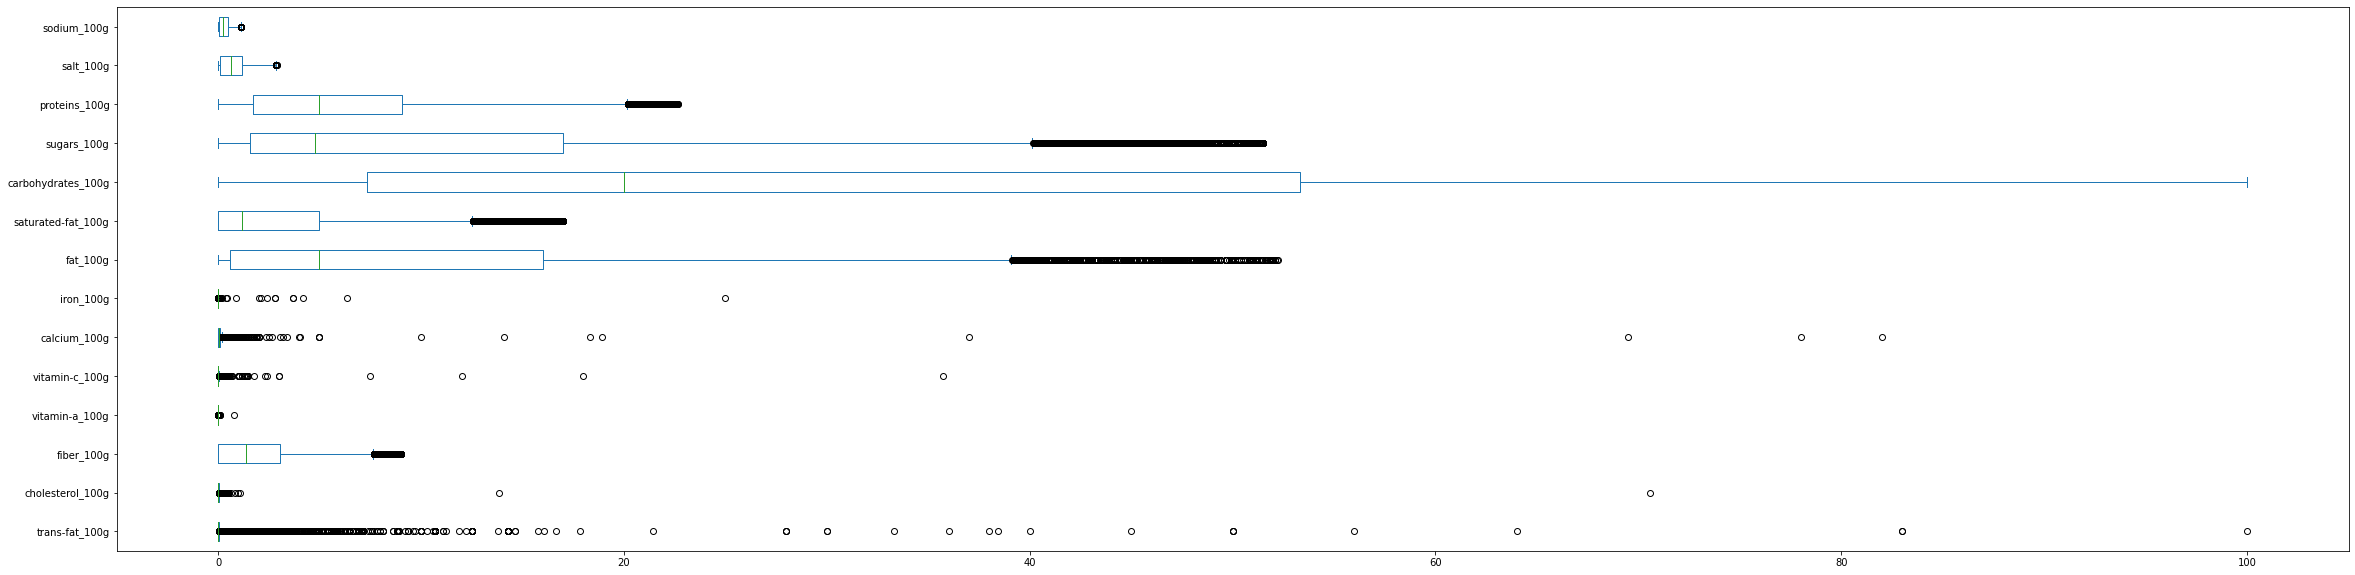

In [ ]:
data[colonnes_100g].plot.box(figsize=(40, 10), vert=False)

data1[colonnes_100g].plot.box(figsize=(40, 10), vert=False)

data2[colonnes_100g].plot.box(figsize=(40, 10), vert=False)

In [ ]:
data2.to_csv('data_clean.csv', sep = "\t")

**Data3** Utilisation de KNN-Imputer

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
data3.isnull().sum()

In [ ]:
colonnes_subset = ["energy_100g","saturated-fat_100g","sugars_100g","proteins_100g","salt_100g","sodium_100g"]
colonnes_a_remplir = ["fat_100g","trans-fat_100g","cholesterol_100g","carbohydrates_100g","fiber_100g","vitamin-a_100g","vitamin-c_100g","calcium_100g","iron_100g"]

for colonne in colonnes_a_remplir :
  colonnes_subset.append(colonne)
  subset_data3 = data3[colonnes_subset]

  imputer_knn = KNNImputer(n_neighbors = 8)
  imputed_knn = imputer_knn.fit_transform(subset_data3)

  subset_data3_imputed = pd.DataFrame(imputed_knn, columns = subset_data3.columns)

  print("Pour la colonne ", str(colonne))
  print("Avant imputation :")
  print("Nombre de valeurs manquantes :" ,subset_data3[colonne].isna().sum())
  print("Moyenne :", subset_data3[colonne].mean(), "| Médiane :", subset_data3[colonne].median())
  print(" ")
  print("Après imputation :")
  print("Nombre de valeurs manquantes :" ,subset_data3_imputed[colonne].isna().sum())
  print("Moyenne :", subset_data3_imputed[colonne].mean(), "| Médiane :", subset_data3_imputed[colonne].median())
  print("________________________________________________")

  data3[colonne] = subset_data3_imputed[colonne].values

In [ ]:
data[colonnes_100g].plot.box(figsize=(40, 10))

data1[colonnes_100g].plot.box(figsize=(40, 10))

data2[colonnes_100g].plot.box(figsize=(40, 10))

data3[colonnes_100g].plot.box(figsize=(40, 10))